<h1>RNN - LSTM x GRU</h1>
<p>O objetivo deste código é apresentar um exemplo simples de aplicação de redes neurais recorrentes (RNN) para a análise de textos (NLP). Neste caso, vamos aplicar deep learning para obter a partir do comentário realizado a cerca de um deteminado filme se este comentário foi ou não positivo. Os dados foram retirados do IMDB, e cujo link segue abaixo: </p>
<p><a href="https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences">Dados de comentários sobre IMDB</a></p>

<p>Vale observar que como são dados utilizados justamente para testes então eles costumam vir já pré-processados de maneira que não é necessário fazer limpezas nos comentários, excluindo por exmeplo caracteres errados ou símbolos. O que será feito é justamente o procedimento de tokenização para depois aplicar os métodos de LSTM e GRU. </p>

<h3>Importando Pacotes</h3>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation,SpatialDropout1D,Embedding,LSTM,GRU
from keras.callbacks import EarlyStopping

<h3>Importando dados do IMDB</h3>

In [3]:
df = pd.read_table('imdb.txt', header=0)
df.head()

,msg,positive
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [4]:
#Informações sobre a base de dados:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 2 columns):
msg         748 non-null object
positive    748 non-null int64
dtypes: int64(1), object(1)
memory usage: 11.8+ KB


In [5]:
#Exemplo de comentário feito sobre um filme:
df.msg[5]

"The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.  "

In [6]:
#Distribuição de filmes avalidados positivamente(1) e negativamente(0)
df['positive'].value_counts()

1    386
0    362
Name: positive, dtype: int64

<h3>Tratando comentários</h3>

In [7]:
#Variáveis para o procedimento de Tokenização:
numero_maximo_palavras = 1000
sequencia_maxima_palavras = 100
dimensao = 100

In [8]:
#Tokenizando:
tokenizer = Tokenizer(num_words=numero_maximo_palavras, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['msg'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 3236 unique tokens.


In [9]:
#Verificando o shape do Tensor:
X = tokenizer.texts_to_sequences(df['msg'].values)
X = pad_sequences(X, maxlen=sequencia_maxima_palavras)
Y = df['positive'].values
print('Shape of data tensor:', X.shape)

Shape of data tensor: (748, 100)


<h3>Preparando dados de Treino e Teste</h3>

In [10]:
#test_size:
ts = 0.20
#random_state:
rs = 100
#Separando os dados de treino e teste:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = ts,random_state = rs)
#Printando resultados:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(598, 100) (598,)
(150, 100) (150,)


<h3>Rodando os modelos</h3>

In [38]:
#Parâmetros:
epochs = 20
batch_size = 32
patience = 3
vs=0.1
md = 0.0001
monitor = 'val_loss'
optimizer = 'adam'    

In [41]:
%%capture --no-stdout
#Modelo LSTM:
modelLSTM = Sequential()
modelLSTM.add(Embedding(numero_maximo_palavras, dimensao, input_length=X.shape[1]))
modelLSTM.add(SpatialDropout1D(0.1))
modelLSTM.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
modelLSTM.add(Dense(10, activation='sigmoid'))
modelLSTM.add(Dense(1, activation='sigmoid'))
# modelLSTM.add(Dense(1, activation='relu'))
modelLSTM.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
#Aprendizado LSTM:
historyLSTM = modelLSTM.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=vs,callbacks=[EarlyStopping(monitor=monitor, patience=patience, min_delta=md)])

/home/franklin/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 538 samples, validate on 60 samples
Epoch 1/20
538/538 [==============================] - 9s 17ms/step - loss: 0.7546 - accuracy: 0.5223 - val_loss: 0.6905 - val_accuracy: 0.5167
Epoch 2/20
538/538 [==============================] - 6s 11ms/step - loss: 0.6907 - accuracy: 0.5558 - val_loss: 0.7037 - val_accuracy: 0.4833
Epoch 3/20
538/538 [==============================] - 6s 12ms/step - loss: 0.6838 - accuracy: 0.5390 - val_loss: 0.6843 - val_accuracy: 0.5667
Epoch 4/20
538/538 [==============================] - 6s 12ms/step - loss: 0.6671 - accuracy: 0.6171 - val_loss: 0.6835 - val_accuracy: 0.4833
Epoch 5/20
538/538 [==============================] - 5s 10ms/step - loss: 0.6303 - accuracy: 0.6171 - val_loss: 0.6384 - val_accuracy: 0.6000
Epoch 6/20
538/538 [==============================] - 7s 12ms/step - loss: 0.5265 - accuracy: 0.7844 - val_loss: 0.5844 - val_accuracy: 0.7167
Epoch 7/20
538/538 [==============================] - 6s 12ms/step - loss: 0.4300 - accuracy: 0.8

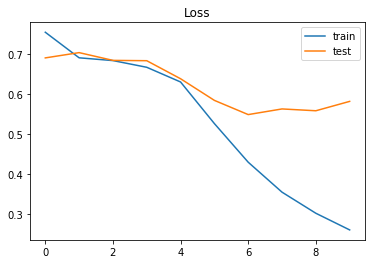

In [43]:
#Curva de Loss do treino e do teste:
plt.title('Loss')
plt.plot(historyLSTM.history['loss'], label='train')
plt.plot(historyLSTM.history['val_loss'], label='test')
plt.legend()
plt.show();

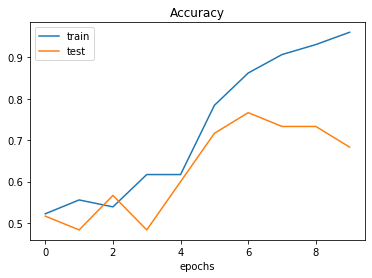

In [44]:
# Accuracy in and out sample
plt.title('Accuracy')
plt.plot(historyLSTM.history['accuracy'], label='train')
plt.plot(historyLSTM.history['val_accuracy'], label='test')
plt.xlabel('epochs')
plt.legend()
plt.show();

### GRU

In [17]:
#Parâmetros:
epochs = 15
batch_size = 32
patience = 3
vs=0.1
md = 0.0001
monitor = 'val_loss'

In [35]:
%%capture --no-stdout
#Modelo GRU:
modelGRU = Sequential()
modelGRU.add(Embedding(numero_maximo_palavras, dimensao, input_length=X.shape[1]))
modelGRU.add(SpatialDropout1D(0.1))

modelGRU.add(GRU(100, dropout=0.1, recurrent_dropout=0.2))
modelGRU.add(Dense(10, activation='sigmoid'))
modelGRU.add(Dense(1, activation='sigmoid'))
# modelGRU.add(Dense(1, activation='relu'))

modelGRU.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
#Aprendizado GRU:
historyGRU = modelGRU.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=vs,callbacks=[EarlyStopping(monitor=monitor, patience=patience, min_delta=md)])

/home/franklin/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 538 samples, validate on 60 samples
Epoch 1/15
538/538 [==============================] - 11s 20ms/step - loss: 0.6900 - accuracy: 0.5335 - val_loss: 0.6936 - val_accuracy: 0.4833
Epoch 2/15
538/538 [==============================] - 8s 14ms/step - loss: 0.6774 - accuracy: 0.5874 - val_loss: 0.6807 - val_accuracy: 0.5333
Epoch 3/15
538/538 [==============================] - 7s 13ms/step - loss: 0.6198 - accuracy: 0.7230 - val_loss: 0.6406 - val_accuracy: 0.6000
Epoch 4/15
538/538 [==============================] - 7s 13ms/step - loss: 0.5045 - accuracy: 0.7918 - val_loss: 0.5728 - val_accuracy: 0.7167
Epoch 5/15
538/538 [==============================] - 7s 14ms/step - loss: 0.3909 - accuracy: 0.8680 - val_loss: 0.5417 - val_accuracy: 0.7667
Epoch 6/15
538/538 [==============================] - 8s 15ms/step - loss: 0.2964 - accuracy: 0.9164 - val_loss: 0.5503 - val_accuracy: 0.7333
Epoch 7/15
538/538 [==============================] - 7s 14ms/step - loss: 0.2456 - accuracy: 0.

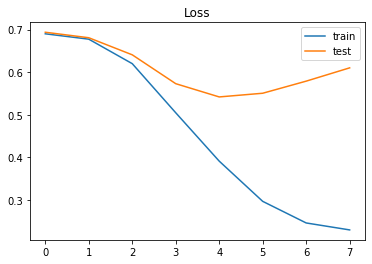

In [37]:
#Curva de Loss do treino e do teste:
plt.title('Loss')
plt.plot(historyGRU.history['loss'], label='train')
plt.plot(historyGRU.history['val_loss'], label='test')
plt.legend()
plt.show();

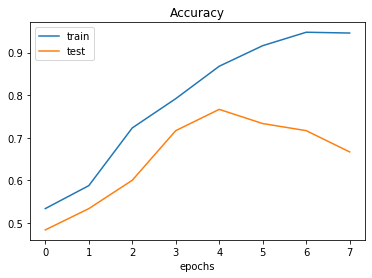

In [45]:
# Accuracy in and out sample
plt.title('Accuracy')
plt.plot(historyGRU.history['accuracy'], label='train')
plt.plot(historyGRU.history['val_accuracy'], label='test')
plt.xlabel('epochs')
plt.legend()
plt.show();